In [25]:
# Model CAPM as a simple linear regression
from scipy import stats
import pandas as pd
import pandas_datareader as wb

In [26]:
spy = wb.DataReader('SPY','yahoo','2010-1-4','2017-7-25')

In [27]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1904 entries, 2010-01-04 to 2017-07-26
Data columns (total 6 columns):
High         1904 non-null float64
Low          1904 non-null float64
Open         1904 non-null float64
Close        1904 non-null float64
Volume       1904 non-null float64
Adj Close    1904 non-null float64
dtypes: float64(6)
memory usage: 104.1 KB


In [28]:
aapl = wb.DataReader('AAPL','yahoo','2010-1-4','2017-7-25')

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

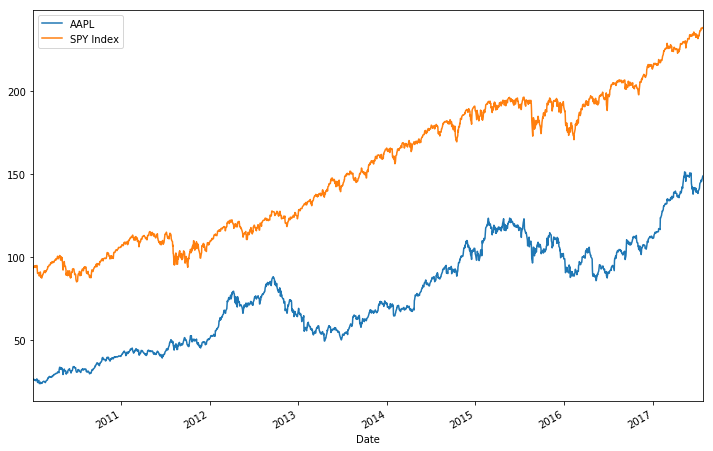

In [30]:
aapl['Adj Close'].plot(label='AAPL',figsize=(12,8))
spy['Adj Close'].plot(label='SPY Index',figsize=(12,8))
plt.legend()

Text(0.5, 1.0, 'Cumulative Return')

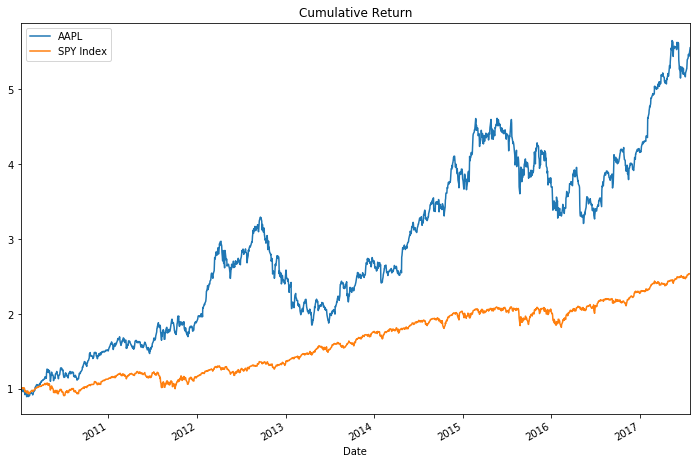

In [31]:
aapl['Cumulative'] = aapl['Adj Close']/aapl['Adj Close'].iloc[0]
spy['Cumulative'] = spy['Adj Close']/spy['Adj Close'].iloc[0]
aapl['Cumulative'].plot(label='AAPL',figsize=(12,8))
spy['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

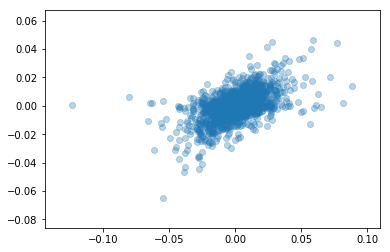

In [32]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)
spy['Daily Return'] = spy['Adj Close'].pct_change(1)

plt.scatter(aapl['Daily Return'],spy['Daily Return'],alpha=0.3)

In [33]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy['Daily Return'].iloc[1:])

In [34]:
beta

0.3247883289820445

In [35]:
alpha

0.00019988330411877632

In [36]:
r_value

0.5556126951798488

## What if our stock was completely related to SP500?

In [37]:
import numpy as np

In [43]:
noise = np.random.normal(0,0.001,len(spy['Daily Return'].iloc[1:]))
noise

array([ 9.43535620e-05,  1.26159712e-03,  1.05582395e-03, ...,
        2.22879779e-04, -1.19652812e-03,  6.21997367e-04])

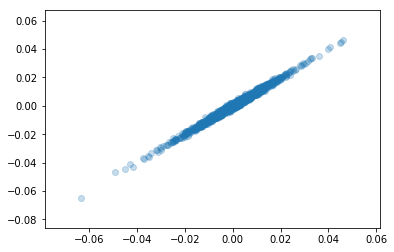

In [44]:
fake_stock = spy['Daily Return'].iloc[1:] + noise

plt.scatter(fake_stock,spy['Daily Return'].iloc[1:],alpha=0.25)

In [45]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy['Daily Return'].iloc[1:])

In [46]:
beta

0.9888539348767852

In [47]:
alpha

-1.4041479484475246e-05